/home/ddmonster/MLMAS_Project/imgdata/saved_image_rgb_front_20240701_065427.png
(512, 1024, 4)
torch.Size([1, 3, 512, 1024])


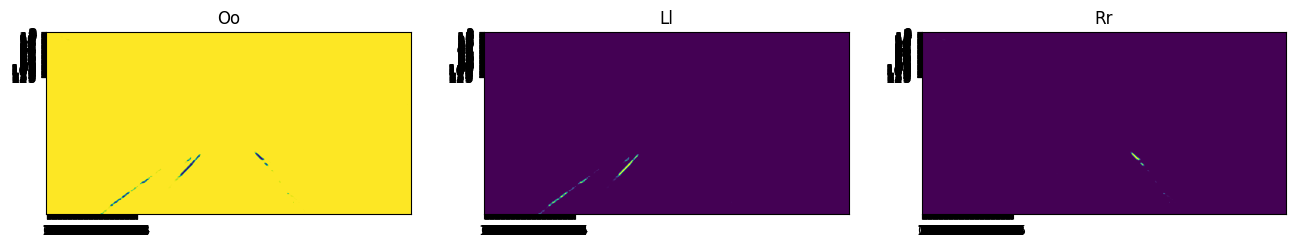

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 512, 1024)


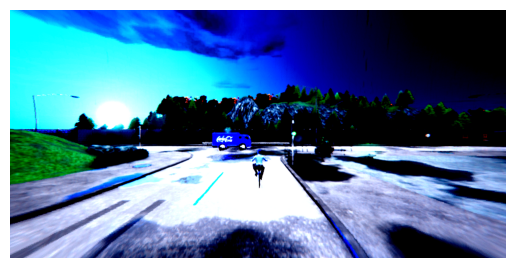

/home/ddmonster/MLMAS_Project/imgdata/saved_image_rgb_front_20240701_065309.png
(512, 1024, 4)
torch.Size([1, 3, 512, 1024])


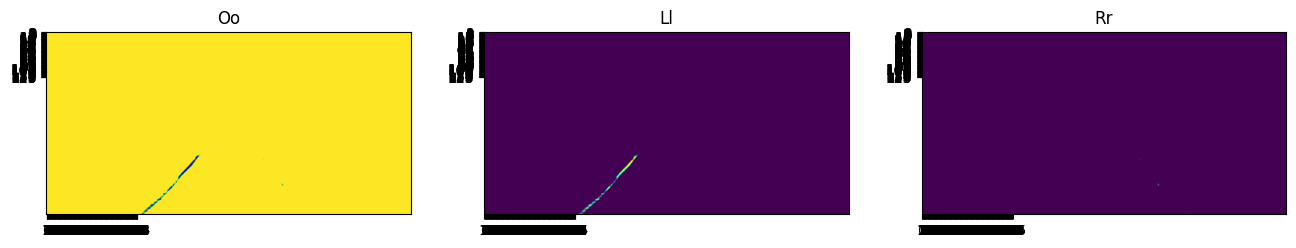

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 512, 1024)


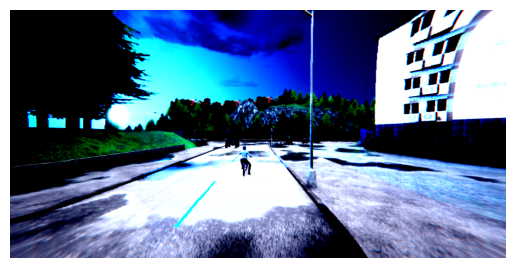

/home/ddmonster/MLMAS_Project/imgdata/saved_image_rgb_front_20240701_065514.png
(512, 1024, 4)
torch.Size([1, 3, 512, 1024])


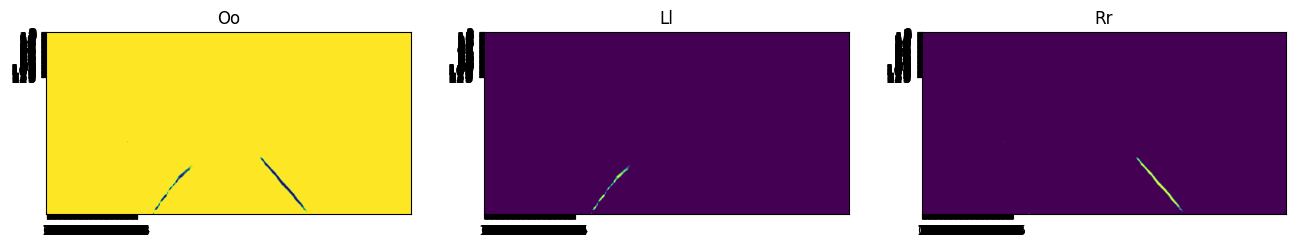

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 512, 1024)


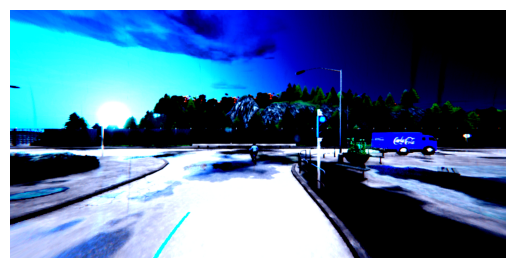

/home/ddmonster/MLMAS_Project/imgdata/saved_image_rgb_front_20240701_065348.png
(512, 1024, 4)
torch.Size([1, 3, 512, 1024])


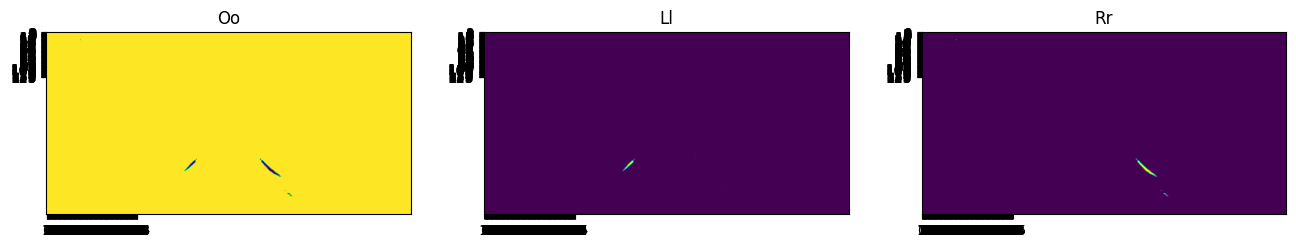

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 512, 1024)


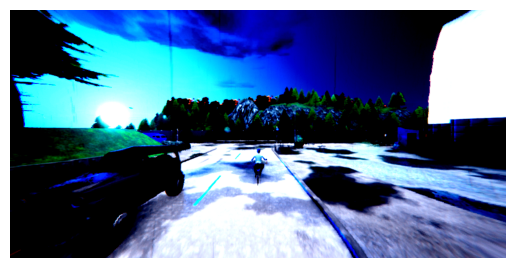

/home/ddmonster/MLMAS_Project/imgdata/saved_image_rgb_front_20240701_065507.png
(512, 1024, 4)
torch.Size([1, 3, 512, 1024])


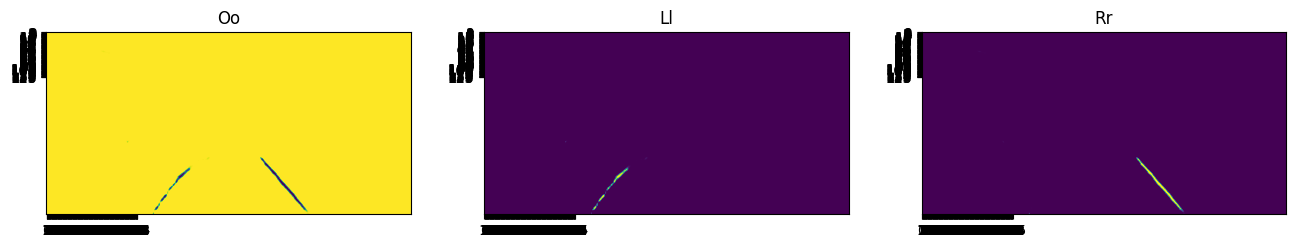

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 512, 1024)


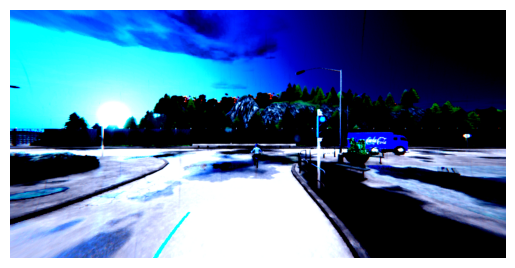

/home/ddmonster/MLMAS_Project/imgdata/saved_image_rgb_front_20240701_065355.png
(512, 1024, 4)
torch.Size([1, 3, 512, 1024])


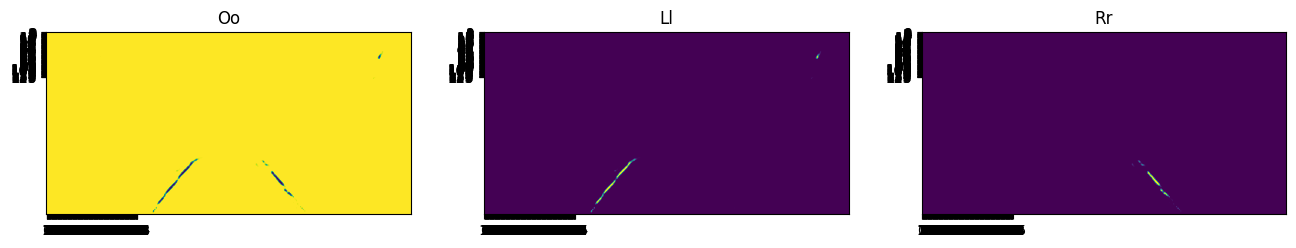

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 512, 1024)


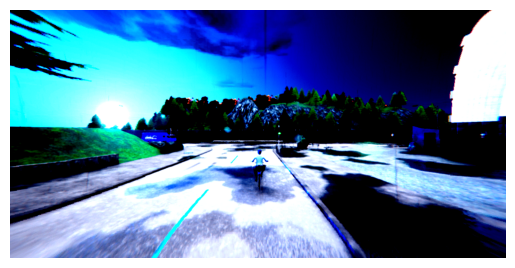

/home/ddmonster/MLMAS_Project/imgdata/saved_image_rgb_front_20240701_065326.png
(512, 1024, 4)
torch.Size([1, 3, 512, 1024])


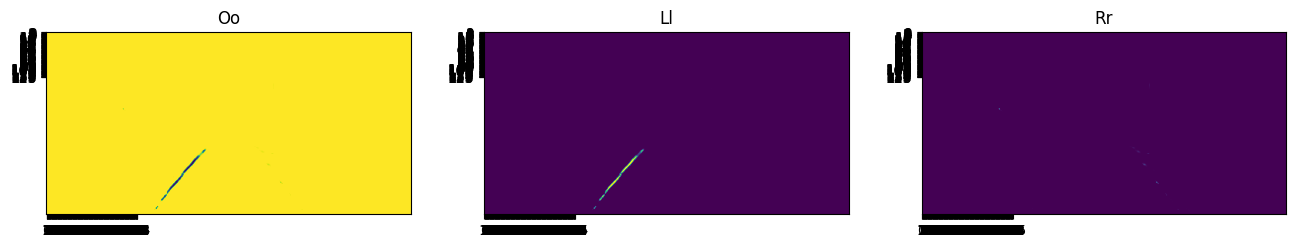

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 512, 1024)


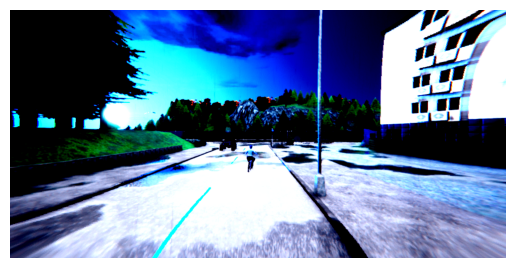

In [10]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import segmentation_models_pytorch as smp
import torch
DEVICE="cuda"

ENCODER = 'efficientnet-b0'
ENCODER_WEIGHTS = 'imagenet'
preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

def visualize(**images):
    """Plot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()
def display_pl(np):
    plt.imshow(np.transpose(1,2,0))
    plt.axis('off')  # Hide axes ticks
    plt.show()
def resize_width_crop_height(img, target_size):
    """
    Resize the image based on the width and crop the height to the target size.
    
    Parameters:
    - img: PIL Image object
    - target_size: tuple of (width, height)
    
    Returns:
    - img: PIL Image object of the target size
    """
    target_width, target_height = target_size
    
    # Calculate the new height maintaining the aspect ratio
    aspect_ratio = img.width / img.height
    new_height = int(target_width / aspect_ratio)
    
    # Resize the image based on the width
    img = img.resize((target_width, new_height), Image.ANTIALIAS)
    
    # If the new height is greater than the target height, crop the image from the center
    if new_height > target_height:
        top = (new_height - target_height) / 2
        bottom = (new_height + target_height) / 2
        img = img.crop((0, top, target_width, bottom))
    
    return img
from pathlib import Path

p = Path("/home/ddmonster/MLMAS_Project/imgdata")
ps = list(p.glob("*.png"))
for i in ps[3:10]:
    print(i)
    # Open the image file
    img = Image.open(i)

    target_size = (1024, 512)

    # Resize based on width and crop the height to the target size
    img_resized = resize_width_crop_height(img, target_size)
    print(np.shape(img_resized))
    # Convert RGBA to RGB if necessary
    if img_resized.mode == 'RGBA':
        img_resized = img_resized.convert('RGB')
    img_array = np.array(img_resized)

    img_array =  preprocessing_fn(img_array)
    # Convert the image to a NumPy array
    best_model = torch.load('./best_model_multi_dice_loss.pth')

    img_array = img_array.transpose(2,0,1).astype('float32')
    x_tensor = torch.from_numpy(img_array).to(DEVICE).unsqueeze(0)
    rs = best_model.predict(x_tensor)
    o = rs[0,0,:,:].cpu().numpy()
    left = rs[0,1,:,:].cpu().numpy()
    right = rs[0,2,:,:].cpu().numpy() 
    print(np.shape(rs))
    visualize(oo=o,ll=left,rr=right)
    print(np.shape(img_array))
    # Display the image using matplotlib
    display_pl(img_array)



